# Join Statements - Lab

## Introduction

In this lab, you'll practice your knowledge of `JOIN` statements, using various types of joins and various methods for specifying the links between them.

## Objectives

You will be able to:
* Write SQL queries that make use of various types of joins
* Compare and contrast the various types of joins
* Discuss how primary and foreign keys are used in SQL
* Decide and perform whichever type of join is best for retrieving desired data

## CRM Schema

In almost all cases, rather than just working with a single table you will typically need data from multiple tables. 
Doing this requires the use of **joins** using shared columns from the two tables. 

In this lab, you'll use the same customer relationship management (CRM) database that you saw from the previous lesson.
<img src='images/Database-Schema.png' width="600">

## Connecting to the Database
Import the necessary packages and connect to the database `'data.sqlite'`.

In [1]:
import sqlite3
conn = sqlite3.connect('data.sqlite')
cur = conn.cursor()

import pandas as pd

def query_to_df(query):
    cur.execute(query)
    df = pd.DataFrame(cur.fetchall())
    df.columns = [x[0] for x in cur.description]
    return df

## Display the names of all the employees in Boston 

Hint: join the employees and offices tables.

In [2]:
cur.description

In [3]:
query1 = '''SELECT lastName, firstName
            FROM employees
            JOIN offices 
            USING(officeCode)
            WHERE offices.city='Boston'
            ;'''
query_to_df(query1)

,lastName,firstName
0,Firrelli,Julie
1,Patterson,Steve


## Are there any offices that have zero employees?
Hint: Combine the employees and offices tables and use a group by.

In [4]:
query2 = '''SELECT officeCode, COUNT(employeeNumber) AS total_employees
            FROM offices
            LEFT JOIN employees
            USING(officeCode)
            GROUP BY officeCode
            ;'''
query_to_df(query2)

,officeCode,total_employees
0,1,6
1,2,2
2,3,2
3,4,5
4,5,2
5,6,4
6,7,2
7,27,0


## Write 3 Questions of your own and answer them

In [5]:
# Answers will vary
# Example: Display the htmlDescription and employee's first and last name for each product that each employee has sold

In [19]:
# How much revenue has each employee brought in

query4 = '''SELECT e.firstName, e.lastName, SUM(p.amount) AS total_revenue, COUNT(p.checkNumber) AS num_transactions
            FROM employees e
            LEFT JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
            LEFT JOIN payments p USING(customerNumber)
            GROUP BY e.employeeNumber
            ORDER BY total_revenue DESC
            ;'''
query4_df = query_to_df(query4)
query4_df['average'] = query4_df['total_revenue']/query4_df['num_transactions']
query4_df


,firstName,lastName,total_revenue,num_transactions,average
0,Gerard,Hernandez,1112003.81,29,38344.958966
1,Leslie,Jennings,989906.55,21,47138.407143
2,Pamela,Castillo,750201.87,27,27785.254444
3,Larry,Bott,686653.25,21,32697.773810
4,Barry,Jones,637672.65,21,30365.364286
5,George,Vanauf,584406.80,20,29220.340000
6,Loui,Bondur,569485.75,19,29972.934211
7,Andy,Fixter,509385.82,16,31836.613750
8,Peter,Marsh,497907.16,14,35564.797143
9,Foon Yue,Tseng,488212.67,17,28718.392353


In [22]:
import plotly.express as px

px.scatter(data_frame=query4_df.dropna(), x='num_transactions', y='total_revenue', color='firstName', size='average')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


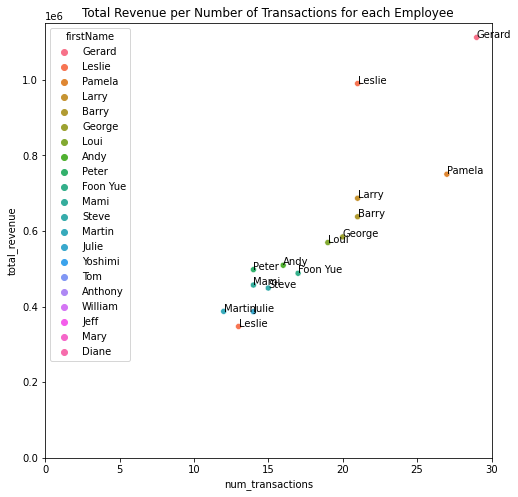

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(8,8))
plt.title('Total Revenue per Number of Transactions for each Employee')
plt.xlim(0,30,5)
plt.ylim(0,1150000,50000)
p1 = sns.scatterplot(data=query4_df, x='num_transactions', y='total_revenue', hue='firstName')

for index, rep in query4_df.iterrows():
    p1.text(rep['num_transactions'], rep['total_revenue'], 
            rep['firstName'])



In [10]:
# How much revenue has each office brought in

query5 = '''SELECT o.city, SUM(p.amount) AS total_revenue, SUM(e.employeeNumber) AS total_employees
            FROM offices o
            JOIN employees e USING(officeCode)
            JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
            JOIN payments p USING(customerNumber)
            GROUP BY o.city
            ORDER BY total_revenue DESC
            ;'''
query_to_df(query5)

,city,total_revenue,total_employees
0,Paris,2819168.90,123384
1,San Francisco,1337439.58,39623
2,London,1324325.90,63105
3,NYC,1072619.47,48322
4,Sydney,1007292.98,48344
5,Boston,835882.33,34872
6,Tokyo,457110.07,22694


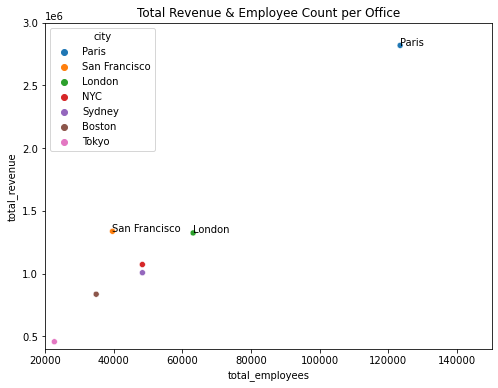

In [11]:
query5_df = query_to_df(query5)

plt.figure(figsize=(8,6))
plt.title('Total Revenue & Employee Count per Office')
plt.xlim(20000,150000,20000)
plt.ylim(400000,3000000,500000)
p1 = sns.scatterplot(data=query5_df, x='total_employees', y='total_revenue', hue='city')

for index, rep in enumerate(query5_df):
    p1.text(query5_df['total_employees'][index], query5_df['total_revenue'][index], 
            query5_df['city'][index])

In [12]:
# Which product line sells the best

query6 = '''SELECT p.productLine, SUM(od.quantityOrdered) as total_ordered
            FROM orderdetails od
            JOIN products p USING(productCode)
            JOIN orders o USING(orderNumber)
            GROUP BY p.productLine
            ORDER BY total_ordered DESC
            ;'''
query_to_df(query6)

,productLine,total_ordered
0,Classic Cars,35582
1,Vintage Cars,22933
2,Motorcycles,12778
3,Planes,11872
4,Trucks and Buses,11001
5,Ships,8532
6,Trains,2818


''

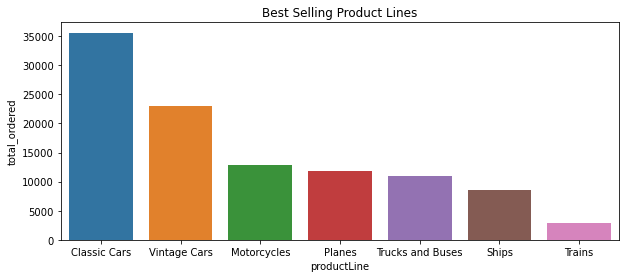

In [13]:
plt.figure(figsize=(10,4))
plt.title('Best Selling Product Lines')
p2 = sns.barplot(data=query_to_df(query6), x='productLine', y='total_ordered')
;

## Level Up: Display the names of every individual product that each employee has sold

In [14]:
query3 = '''SELECT e.firstName, e.lastName, p.productName
            FROM employees e
            JOIN customers c 
            ON e.employeeNumber = c.salesRepEmployeeNumber
            JOIN orders o USING(customerNumber)
            JOIN orderdetails od USING(orderNumber)
            JOIN products p USING(productCode)
            GROUP BY e.employeeNumber
            ORDER BY p.buyPrice
            ;'''
query_to_df(query3)

,firstName,lastName,productName
0,George,Vanauf,1969 Harley Davidson Ultimate Chopper
1,Martin,Gerard,The Titanic
2,Gerard,Hernandez,1965 Aston Martin DB5
3,Andy,Fixter,1996 Moto Guzzi 1100i
4,Leslie,Jennings,1958 Setra Bus
5,Pamela,Castillo,1972 Alfa Romeo GTA
6,Larry,Bott,1972 Alfa Romeo GTA
7,Leslie,Thompson,1917 Grand Touring Sedan
8,Steve,Patterson,2001 Ferrari Enzo
9,Foon Yue,Tseng,2001 Ferrari Enzo


## Level Up: Display the Number of Products each employee has sold

In [15]:
query7 = '''SELECT e.firstName, e.lastName, SUM(od.quantityOrdered) AS total_products_sold
            FROM employees e
            JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
            JOIN orders o USING(customerNumber)
            JOIN orderdetails od USING(orderNumber)
            GROUP BY e.employeeNumber
            ORDER BY total_products_sold DESC
            ;'''
query_to_df(query7)

,firstName,lastName,total_products_sold
0,Gerard,Hernandez,14231
1,Leslie,Jennings,11854
2,Pamela,Castillo,9290
3,Larry,Bott,8205
4,Barry,Jones,7486
5,George,Vanauf,7423
6,Peter,Marsh,6632
7,Andy,Fixter,6246
8,Loui,Bondur,6186
9,Steve,Patterson,5561


## Summary

Congrats! You practiced using join statements and leveraged your foreign keys knowledge!